# TM10007 Assignment template

In [ ]:
# Run this to use from colab environment
#!pip install -q --upgrade git+https://github.com/jveenland/tm10007_ml.git

## Data loading and cleaning

Below are functions to load the dataset of your choice. After that, it is all up to you to create and evaluate a classification method. Beware, there may be missing values in these datasets. Good luck!

In [62]:
from worclipo.load_data import load_data
from sklearn.model_selection import train_test_split, StratifiedKFold

data = load_data()
print(f'The number of samples: {len(data.index)}')
print(f'The number of columns: {len(data.columns)}')

X = data.drop("label",axis=1)
y = data["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train), 1):
    X_train_fold = X_train.iloc[train_idx]
    y_train_fold = y_train.iloc[train_idx]
    X_val_fold = X_train.iloc[val_idx]
    y_val_fold = y_train.iloc[val_idx]

    print(f"Fold {fold}:")
    print(f" - Train size: {len(X_train_fold)}")
    print(f" - Validation size: {len(X_val_fold)}")


The number of samples: 115
The number of columns: 494
Fold 1:
 - Train size: 73
 - Validation size: 19
Fold 2:
 - Train size: 73
 - Validation size: 19
Fold 3:
 - Train size: 74
 - Validation size: 18
Fold 4:
 - Train size: 74
 - Validation size: 18
Fold 5:
 - Train size: 74
 - Validation size: 18


General functions to be used

In [63]:
# General packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets as ds
import seaborn

# Classifiers
from sklearn import model_selection
from sklearn import metrics

# Some functions we will use
def colorplot(clf, ax, x, y, h=100, precomputer=None):
    '''
    Overlay the decision areas as colors in an axes.

    Input:
        clf: trained classifier
        ax: axis to overlay color mesh on
        x: feature on x-axis
        y: feature on y-axis
        h(optional): steps in the mesh
    '''
    # Create a meshgrid the size of the axis
    xstep = (x.max() - x.min() ) / 20.0
    ystep = (y.max() - y.min() ) / 20.0
    x_min, x_max = x.min() - xstep, x.max() + xstep
    y_min, y_max = y.min() - ystep, y.max() + ystep
    h = max((x_max - x_min, y_max - y_min))/h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    features = np.c_[xx.ravel(), yy.ravel()]
    if precomputer is not None:
        if type(precomputer) is RBFSampler:
            features = precomputer.transform(features)
        elif precomputer is rbf_kernel:
            features = rbf_kernel(features, X)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(features)
    else:
        Z = clf.predict_proba(features)
    if len(Z.shape) > 1:
        Z = Z[:, 1]

    # Put the result into a color plot
    cm = plt.cm.RdBu_r
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
    del xx, yy, x_min, x_max, y_min, y_max, Z, cm

def plot_learning_curve(estimator, title, X, y, axes, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores  = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")

    return plt

def plot_roc_curve(y_score, y_truth):
    '''
    Plot an ROC curve.
    '''
    # Only take scores for class = 1
    y_score = y_score[:, 1]

    # Compute ROC curve and ROC area for each class
    fpr, tpr, _ = roc_curve(y_truth, y_score)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

### Preprocessing

Missing data
* Part 1: Finding missing data

In [64]:
# Define missing value indicators
custom_missing = ['NA', 'N/A', '?', 'None', 'none', '-']

# Count NaNs
nan_counts = X_train.isna().sum()

# Count empty strings
empty_string_counts = (X_train == '').sum()

# Count custom missing indicators (case-insensitive match)
custom_missing_counts = X_train.apply(lambda col: col.astype(str).str.lower().isin([val.lower() for val in custom_missing]).sum())

# Compute total missing count per column
total_missing = nan_counts + empty_string_counts + custom_missing_counts

# Filter out columns where total missing is zero
total_missing_selected = total_missing[total_missing != 0]

# Print total missing counts
print(total_missing_selected)

Series([], dtype: int64)


* Part 2: Processing missing data

In [65]:
# Import
import numpy as np
from sklearn.impute import SimpleImputer
from scipy.stats import shapiro

# Replacing missing values with NaN
custom_missing = ['NA', 'N/A', '?', 'None', 'none', '-', '']
X_train.replace(custom_missing, np.nan, inplace=True)
X_test.replace(custom_missing, np.nan, inplace=True)

# If 50% or more of the data within one feature is missing the feature is deleted
limit = len(X_train.index)*50/100
valid_columns = [col for col, count in total_missing.items() if count < limit]

# Keep only the valid columns in both X_train and X_test
X_train = X_train[valid_columns]
X_test = X_test[valid_columns]

# Imputate

# Check if imputation is needed
if X_train.isna().sum().sum() == 0:
    pass
else:
    # Dictionary to store mean/median decision per column
    imputation_strategies = {}

    for col in X_train.select_dtypes(include=['number']).columns:  # Only numeric columns
        col_data = X_train[col].dropna()  # Remove NaN values for testing

        if len(col_data) > 3:  # Shapiro requires at least 3 non-null values
            if col_data.nunique() == 1:  # Check if all values are the same
                strategy = 'median'  # Default to median if no variability
            else:
                _, p = shapiro(col_data)
                strategy = 'mean' if p > 0.05 else 'median'
        else:
            strategy = 'median'  # Default to median if too few values

        imputation_strategies[col] = strategy

    # Create imputers for mean and median
    mean_imputer = SimpleImputer(strategy='mean')
    median_imputer = SimpleImputer(strategy='median')

    # Apply imputers for each feature
    for col, strategy in imputation_strategies.items():
        imputer = mean_imputer if strategy == 'mean' else median_imputer
        X_train[col] = imputer.fit_transform(X_train[[col]])
        X_test[col] = imputer.transform(X_test[[col]])  # Use the same imputer

Scaling data

In [66]:
import pandas as pd
from sklearn import preprocessing

scaler_robust = preprocessing.RobustScaler()

scaled_robust_array_train = scaler_robust.fit_transform(X_train)
scaled_robust_array_test = scaler_robust.transform(X_test)

X_scaled_robust_train = pd.DataFrame(scaled_robust_array_train, columns=X_train.columns)
X_scaled_robust_test = pd.DataFrame(scaled_robust_array_test, columns=X_test.columns)

print(X_scaled_robust_test)

    PREDICT_original_sf_compactness_avg_2.5D  \
0                                   0.896064   
1                                   0.616268   
2                                   0.175550   
3                                   0.857793   
4                                  -0.455090   
5                                  -0.180561   
6                                  -0.886215   
7                                   0.984786   
8                                   0.203404   
9                                   0.968292   
10                                 -0.692793   
11                                  0.895339   
12                                  0.627915   
13                                  0.332836   
14                                 -0.503299   
15                                  0.245738   
16                                 -0.522331   
17                                  0.617171   
18                                  0.664795   
19                                  0.21

### Feature extraction

First step: variance based thresholding

In [67]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold

def apply_variance_threshold(X_train, X_test, threshold=0.95):
    """
    Applies variance thresholding to remove low-variance features.

    Args:
        X_train (pd.DataFrame): Scaled training feature set.
        X_test (pd.DataFrame): Scaled test feature set.
        threshold (float): Threshold for variance. Features with variance below this will be removed.

    Returns:
        X_train_filtered (pd.DataFrame): Filtered training set.
        X_test_filtered (pd.DataFrame): Filtered test set.
        selected_features (List[str]): Names of the retained features.
    """
    selector_variance_threshold = VarianceThreshold(threshold=threshold)
    X_train_filtered_variance_np = selector_variance_threshold.fit_transform(X_train)
    selected_features = X_train.columns[selector_variance_threshold.get_support()]
    
    X_train_filtered = pd.DataFrame(X_train_filtered_variance_np, columns=selected_features, index=X_train.index)
    X_test_filtered = pd.DataFrame(selector_variance_threshold.transform(X_test), columns=selected_features, index=X_test.index)

    print(f"[VarianceThreshold] Remaining features: {len(selected_features)}")
    return X_train_filtered, X_test_filtered, selected_features

X_filtered_train_variance_new, X_filtered_test_variance_new, variance_filtered_features_new = apply_variance_threshold(X_scaled_robust_train, X_scaled_robust_test)
print(X_filtered_train_variance_new.shape)
print(X_filtered_test_variance_new.shape)

[VarianceThreshold] Remaining features: 175
(92, 175)
(23, 175)


Filtering with ANOVA: linear relations

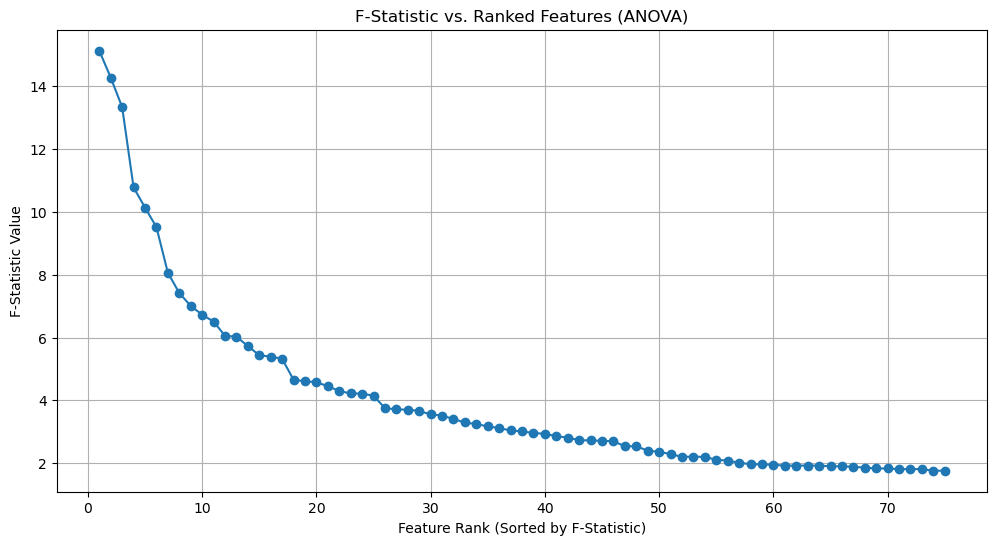

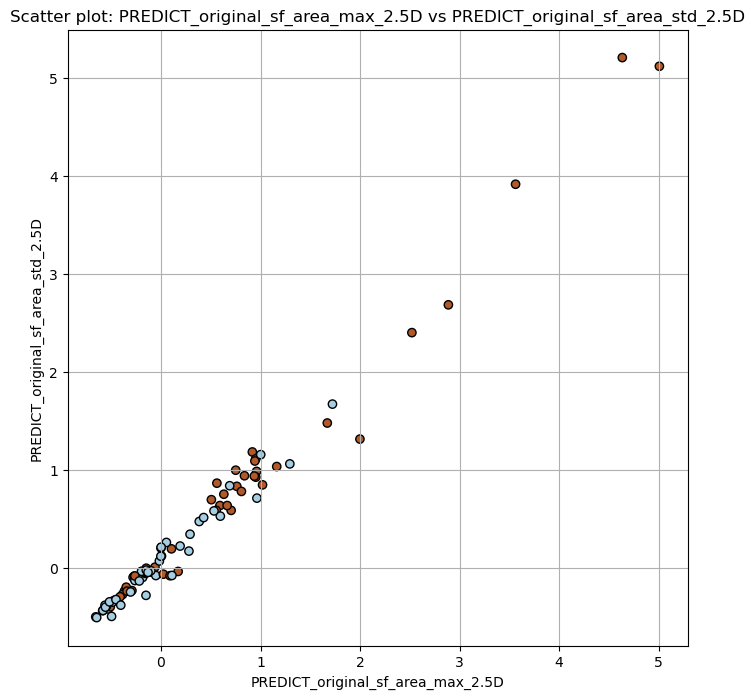

[ANOVA] Selected top-75 features.


In [83]:
def select_features_anova(X_train, y_train, X_test, k=75, plot=True):
    """
    Selects the top-k features using ANOVA F-test (for linear dependencies).

    Args:
        X_train (pd.DataFrame): Training features. 
        y_train (pd.Series or np.array): Training labels, numerically encoded
        X_test (pd.DataFrame): Test features.
        k (int): Number of top features to select.
        plot (bool): If True, visualizes F-statistics and top 2 feature scatter plot.

    Returns:
        X_train_anova (pd.DataFrame): Training set with selected features.
        X_test_anova (pd.DataFrame): Test set with selected features.
        selected_features (List[str]): Names of the selected features.
    """
    selector_anova = SelectKBest(f_classif, k=k)
    X_train_filtered_anova_np = selector_anova.fit_transform(X_train, y_train)
    selected_features = X_train.columns[selector_anova.get_support()]
    
    X_train_anova = pd.DataFrame(X_train_filtered_anova_np, columns=selected_features, index=X_train.index)
    X_test_anova = pd.DataFrame(selector_anova.transform(X_test), columns=selected_features, index=X_test.index)

    if plot:
        f_values, p_values = selector_anova.scores_, selector_anova.pvalues_
        results = pd.DataFrame({'Feature': X_train.columns, 'F-Statistic': f_values, 'p-value': p_values})
        selected = results[results['Feature'].isin(selected_features)].sort_values(by='F-Statistic', ascending=False)

        # Plot F-statistics
        plt.figure(figsize=(12, 6))
        plt.plot(np.arange(1, len(selected) + 1), selected['F-Statistic'], marker='o')
        plt.xlabel("Feature Rank (Sorted by F-Statistic)")
        plt.ylabel("F-Statistic Value")
        plt.title("F-Statistic vs. Ranked Features (ANOVA)")
        plt.grid(True)
        plt.show()

        # Scatter plot of top 2 features
        top2 = selected.iloc[:2]['Feature'].values
        plt.figure(figsize=(8, 8))
        plt.scatter(X_train[top2[0]], X_train[top2[1]], c=y_train, cmap=plt.cm.Paired, edgecolor='k')
        plt.xlabel(top2[0])
        plt.ylabel(top2[1])
        plt.title(f"Scatter plot: {top2[0]} vs {top2[1]}")
        plt.grid(True)
        plt.show()

    print(f"[ANOVA] Selected top-{k} features.")
    return X_train_anova, X_test_anova, selected_features

# Transform labels to numeric values, i.e. 0 or 1 
le = LabelEncoder()
y_train_numeric = le.fit_transform(y_train)
legend_labels = le.classes_  # shows mapping from labels to numbers (for plotting/checking)

X_filtered_train_anova_new, X_filtered_test_anova_new, anova_selected_features_new = select_features_anova(X_filtered_train_variance_new, y_train_numeric, X_filtered_test_variance_new)
# print(anova_selected_features_new)
# print(X_filtered_test_anova_new)

Filtering with mutual information: non-linear relationships

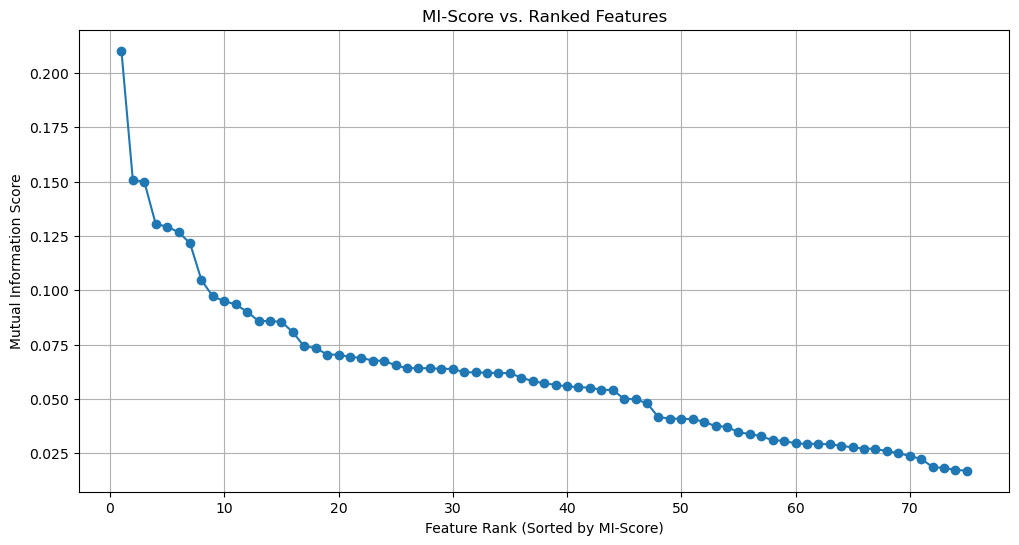

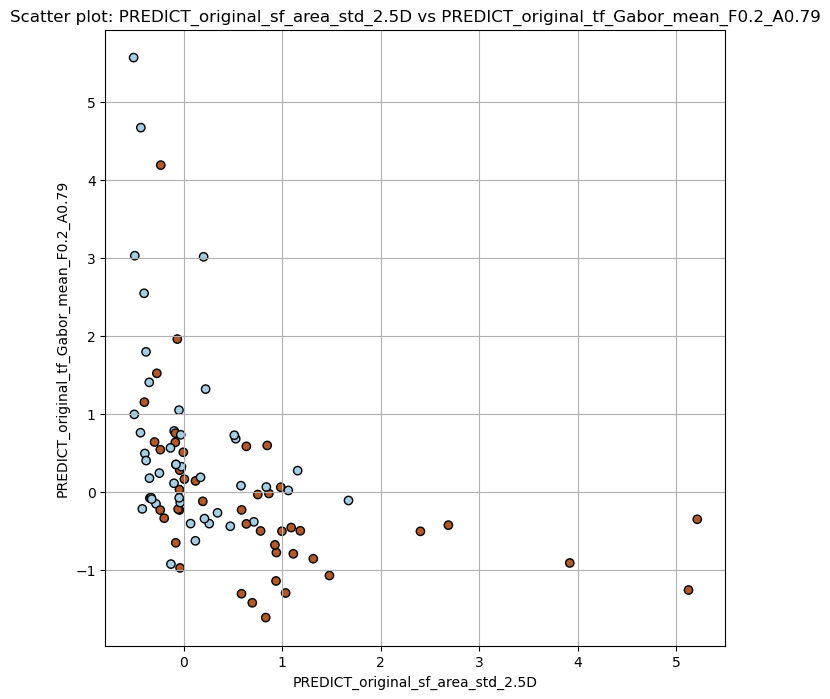

[Mutual Information] Selected top-75 features.


In [84]:
def select_features_mi(X_train, y_train, X_test, k=75, plot=True, random_state=42):
    """
    Selects the top-k features using mutual information (for non-linear dependencies).

    Args:
        X_train (pd.DataFrame): Training features.
        y_train (pd.Series or np.array): Training labels, numerically encoded
        X_test (pd.DataFrame): Test features.
        k (int): Number of top features to select.
        plot (bool): If True, plots MI scores and a 2D scatterplot of top 2 features.
        random_state (int): Random seed for reproducibility.

    Returns:
        X_train_mi (pd.DataFrame): Training set with selected features.
        X_test_mi (pd.DataFrame): Test set with selected features.
        selected_features (List[str]): Names of the selected features.
    """
    selector_mi = SelectKBest(lambda X, y: mutual_info_classif(X, y, random_state=random_state), k=k)
    X_train_filtered_mi_np = selector_mi.fit_transform(X_train, y_train)
    selected_features = X_train.columns[selector_mi.get_support()]

    X_train_mi = pd.DataFrame(X_train_filtered_mi_np, columns=selected_features, index=X_train.index)
    X_test_mi = pd.DataFrame(selector_mi.transform(X_test), columns=selected_features, index=X_test.index)

    if plot:
        scores = selector_mi.scores_
        results = pd.DataFrame({'Feature': X_train.columns, 'MI-Score': scores})
        selected = results[results['Feature'].isin(selected_features)].sort_values(by='MI-Score', ascending=False)

        # Plot MI-scores
        plt.figure(figsize=(12, 6))
        plt.plot(np.arange(1, len(selected) + 1), selected['MI-Score'], marker='o')
        plt.xlabel("Feature Rank (Sorted by MI-Score)")
        plt.ylabel("Mutual Information Score")
        plt.title("MI-Score vs. Ranked Features")
        plt.grid(True)
        plt.show()

        # Scatter plot of top 2 MI features
        top2 = selected.iloc[:2]['Feature'].values
        plt.figure(figsize=(8, 8))
        plt.scatter(X_train[top2[0]], X_train[top2[1]], c=y_train, cmap=plt.cm.Paired, edgecolor='k')
        plt.xlabel(top2[0])
        plt.ylabel(top2[1])
        plt.title(f"Scatter plot: {top2[0]} vs {top2[1]}")
        plt.grid(True)
        plt.show()

    print(f"[Mutual Information] Selected top-{k} features.")
    return X_train_mi, X_test_mi, selected_features

X_filtered_train_mi_new, X_filtered_test_mi_new, mi_selected_features_new = select_features_mi(X_filtered_train_variance_new, y_train_numeric, X_filtered_test_variance_new)

Take union of ANOVA & MI selected sets: in this way we take linear and non-linear relations in the data

In [85]:
def combine_feature_sets_union(X_full_train, X_full_test, features1, features2):
    """
    Creates a feature subset based on the union of two feature lists.

    Args:
        X_full_train (pd.DataFrame): Original training DataFrame (after variance filtering).
        X_full_test (pd.DataFrame): Original test DataFrame (after variance filtering).
        features1 (List[str]): List of selected features (e.g., from ANOVA).
        features2 (List[str]): List of selected features (e.g., from MI).

    Returns:
        X_union_train (pd.DataFrame): Training set with union of features.
        X_union_test (pd.DataFrame): Test set with union of features.
        union_features (List[str]): Combined list of feature names.
    """
    union_features = list(set(features1).union(set(features2)))
    X_union_train = X_full_train[union_features]
    X_union_test = X_full_test[union_features]

    print(f"[Feature Union] Combined feature set size: {len(union_features)}")
    return X_union_train, X_union_test, union_features

X_filtered_train_union_new, X_filtered_test_union_new, union_features_new = combine_feature_sets_union(X_filtered_train_variance_new, X_filtered_test_variance_new, anova_selected_features_new, mi_selected_features_new)
print(len(union_features_new))
print(union_features_new)

[Feature Union] Combined feature set size: 111
111
['PREDICT_original_tf_Gabor_quartile_range_F0.2_A0.79', 'PREDICT_original_phasef_monogenic_min_WL3_N5', 'PREDICT_original_tf_Gabor_energy_F0.5_A2.36', 'PREDICT_original_phasef_phasesym_kurtosis_WL3_N5', 'PREDICT_original_tf_Gabor_max_F0.05_A0.79', 'PREDICT_original_vf_Frangi_edge_std_SR(1.0, 10.0)_SS2.0', 'PREDICT_original_tf_Gabor_std_F0.5_A1.57', 'PREDICT_original_tf_GLCMMS_contrastd3.0A2.36mean', 'PREDICT_original_sf_area_min_2.5D', 'PREDICT_original_vf_Frangi_full_skewness_SR(1.0, 10.0)_SS2.0', 'PREDICT_original_tf_Gabor_std_F0.05_A0.0', 'PREDICT_original_logf_peak_position_sigma1', 'PREDICT_original_tf_Gabor_min_F0.5_A0.0', 'PREDICT_original_tf_LBP_energy_R8_P24', 'PREDICT_original_tf_Gabor_kurtosis_F0.5_A0.0', 'PREDICT_original_vf_Frangi_edge_kurtosis_SR(1.0, 10.0)_SS2.0', 'PREDICT_original_tf_Gabor_max_F0.2_A0.79', 'PREDICT_original_tf_Gabor_min_F0.05_A0.79', 'PREDICT_original_tf_LBP_quartile_range_R3_P12', 'PREDICT_original_tf_

Testing n_features_to_select = 75
Accuracy for 75 features: 0.9674


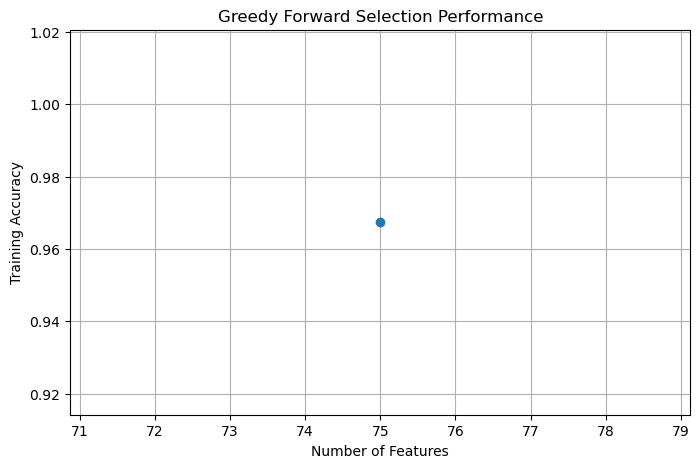


 Greedy Forward Selection complete.
Optimal number of features: 75
Best training accuracy: 0.9674


In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SequentialFeatureSelector
import matplotlib.pyplot as plt
import pandas as pd
from typing import List, Tuple, Union
from sklearn.base import clone

def greedy_forward_selection(
    X_train: pd.DataFrame,
    y_train: Union[pd.Series, list, np.ndarray],
    X_test: pd.DataFrame,
    model=None,
    feature_range: List[int] = None,
    scoring: str = 'accuracy',
    cv_splits: int = 4,
    plot: bool = True
) -> Tuple[pd.DataFrame, pd.DataFrame, List[str], int, float]:
    """
    Applies greedy forward feature selection with a given model.

    Args:
        X_train (pd.DataFrame): Training features.
        y_train (array-like): Training labels.
        X_test (pd.DataFrame): Test features.
        model: Scikit-learn classifier (default: LogisticRegression).
        feature_range (list): List of n_features_to_select to evaluate.
        scoring (str): Scoring metric (e.g. 'accuracy', 'roc_auc').
        cv_splits (int): Number of folds for cross-validation.
        plot (bool): Whether to plot accuracy vs. feature count.

    Returns:
        X_train_selected (pd.DataFrame): Selected training features.
        X_test_selected (pd.DataFrame): Selected test features.
        best_features (List[str]): Names of selected features.
        best_n_features (int): Number of selected features.
        best_accuracy (float): Training accuracy using selected features.
    """
    if model is None:
        from sklearn.linear_model import LogisticRegression
        model = LogisticRegression(max_iter=1000, random_state=42)

    if feature_range is None:
        total_features = X_train.shape[1]
        minimum_number_to_select = 95
        maximum_number_to_select = 110
        stepsize = 5
        feature_range = list(range(minimum_number_to_select, maximum_number_to_select+1, stepsize))

    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)

    best_accuracy = 0
    best_n_features = None
    best_features = []
    accuracy_list = []

    for n_features in feature_range:
        print(f"Testing n_features_to_select = {n_features}")

        sfs = SequentialFeatureSelector(
            model,
            n_features_to_select=n_features,
            direction='forward',
            scoring=scoring,
            cv=cv,
            n_jobs=-1
        )
        sfs.fit(X_train, y_train)
        selected = list(X_train.columns[sfs.get_support()])

        X_train_sel = X_train[selected]
        X_test_sel = X_test[selected]

        # new model per run
        current_model = clone(model)
        current_model.fit(X_train_sel, y_train)
        acc = current_model.score(X_train_sel, y_train)
        accuracy_list.append(acc)

        print(f"Accuracy for {n_features} features: {acc:.4f}")

        if acc > best_accuracy:
            best_accuracy = acc
            best_n_features = n_features
            best_features = selected

    if plot:
        plt.figure(figsize=(8, 5))
        plt.plot(feature_range, accuracy_list, marker='o')
        plt.xlabel("Number of Features")
        plt.ylabel(f"Training {scoring.capitalize()}")
        plt.title("Greedy Forward Selection Performance")
        plt.grid(True)
        plt.show()

    print("\n Greedy Forward Selection complete.")
    print(f"Optimal number of features: {best_n_features}")
    print(f"Best training {scoring}: {best_accuracy:.4f}")

    X_train_best = X_train[best_features]
    X_test_best = X_test[best_features]

    return X_train_best, X_test_best, best_features, best_n_features, best_accuracy

X_train_selected_sfs, X_test_selected_sfs, sfs_selected_features, number_of_sfs_selected_features, train_acc = greedy_forward_selection(
    X_filtered_train_union_new, y_train_numeric, X_filtered_test_union_new,
    feature_range=list(range(75, 76, 1)),
    scoring='accuracy'
    )

Further refining with rfecv

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

def rfecv_refinement(
    X_train: pd.DataFrame,
    y_train: Union[pd.Series, list, np.ndarray],
    X_test: pd.DataFrame,
    model=None,
    min_features_to_select: int = 10,
    step: int = 1,
    scoring: str = 'accuracy',
    cv_splits: int = 4,
    plot: bool = True
):
    """
    Applies RFECV (recursive feature elimination with cross-validation) to refine a feature subset.

    Args:
        X_train (pd.DataFrame): Feature-selected training set.
        y_train (array-like): Labels.
        X_test (pd.DataFrame): Test set (same columns as X_train).
        model: Estimator to use (default: LogisticRegression).
        min_features_to_select (int): Minimum number of features to retain.
        step (int): How many features to remove at each iteration.
        scoring (str): Scoring metric.
        cv_splits (int): Number of CV folds.
        plot (bool): Whether to plot performance vs. feature count.

    Returns:
        X_train_refined (pd.DataFrame): Refined training set.
        X_test_refined (pd.DataFrame): Refined test set.
        selected_features (List[str]): Names of retained features.
        n_selected (int): Number of selected features.
        score (float): Final training score.
    """
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import roc_auc_score
    import matplotlib.pyplot as plt
    import numpy as np

    if model is None:
        model = LogisticRegression(max_iter=1000, random_state=42)

    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)
    rfecv = RFECV(
        estimator=clone(model),
        step=step,
        cv=cv,
        scoring=scoring,
        n_jobs=-1,
        min_features_to_select=min_features_to_select
    )

    print(f"\n Running RFECV refinement...")
    rfecv.fit(X_train, y_train)

    selected_features = X_train.columns[rfecv.get_support()]
    X_train_refined = X_train[selected_features]
    X_test_refined = X_test[selected_features]

    # Score model on refined set
    final_model = clone(model)
    final_model.fit(X_train_refined, y_train)
    score = final_model.score(X_train_refined, y_train)

    if plot and hasattr(rfecv, 'grid_scores_'):
        plt.figure(figsize=(8, 5))
        plt.plot(range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
                 rfecv.grid_scores_, marker='o')
        plt.xlabel("Number of Features")
        plt.ylabel(f"Cross-validated {scoring.capitalize()}")
        plt.title("RFECV Performance vs. Number of Features")
        plt.grid(True)
        plt.show()

    print(f"\n✅ RFECV selected {len(selected_features)} features")
    print("Top features:", list(selected_features))
    print(f"{scoring.capitalize()} on training set after refinement: {score:.4f}")

    return X_train_refined, X_test_refined, list(selected_features), len(selected_features), score

X_train_refined_rfecv, X_test_refined_rfecv, refined_features, n_rfecv, train_score = rfecv_refinement(
    X_train_selected_sfs, y_train_numeric, X_test_selected_sfs, 
)

Datasets after feature extraction

In [79]:
X_train_selected_final = X_train_selected_sfs
print(X_train_selected_final.shape)
X_test_selected_final = X_test_selected_sfs
print(X_test_selected_final.shape)
selected_features_final = sfs_selected_features
print(len(selected_features_final))

(92, 75)
(23, 75)
75


Importing Libraries for Lasso Feature Selection

In [6]:
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.decomposition import PCA


Standardized scaling for Lasso Feature Selection

In [ ]:

def scaler_standardized(X_train, X_test):
    """
    Scales the original training and test datasets using standardization (zero mean, unit variance). 
    
    This function applies `StandardScaler` from `sklearn.preprocessing` to transform 
    `X_train` and `X_test`, which is necessary for Lasso feature selection and other 
    machine learning models that require standardized input.

    Returns:
        tuple: A tuple containing:
            - `X_scaled_standard_train` (pd.DataFrame): The standardized training dataset.
            - `X_scaled_standard_test` (pd.DataFrame): The standardized test dataset.
    
    Note:
        The function assumes `X_train` and `X_test` are already defined globally.
    """
    scaler_standard = preprocessing.StandardScaler()

    scaled_standard_array_train = scaler_standard.fit_transform(X_train)
    scaled_standard_array_test = scaler_standard.transform(X_test)

    X_scaled_standard_train = pd.DataFrame(scaled_standard_array_train, columns=X_train.columns)
    X_scaled_standard_test = pd.DataFrame(scaled_standard_array_test, columns=X_test.columns)

    return X_scaled_standard_train, X_scaled_standard_test


Encode the categorical y-labels to numerical values

In [ ]:
def y_numeric(y_train, y_test):
    """
    Encodes categorical labels from `y_train` and `y_test` into numeric values using `LabelEncoder`.

    This function applies `LabelEncoder` from `sklearn.preprocessing` to transform categorical target 
    labels into numerical format, which is essential for machine learning models that require numeric inputs.

    Args:
        y_train (pd.Series): The training labels.
        y_test (pd.Series): The test labels.

    Returns:
        tuple: A tuple containing:
            - `y_train_numeric` (numpy.ndarray): The transformed numeric labels for the training set.
            - `y_test_numeric` (numpy.ndarray): The transformed numeric labels for the test set.

    Prints:
        - A dictionary mapping numeric labels to their corresponding original class names.

    Note:
        The function assumes `y_train` and `y_test` contain categorical labels.
    """
    le = LabelEncoder()
    y_train_numeric = le.fit_transform(y_train)
    y_test_numeric = le.transform(y_test)

    # Store the mapping of labels
    legend_labels = le.classes_  # This saves the original class names
    print("Label Mapping:", {i: label for i, label in enumerate(legend_labels)})

    return y_train_numeric, y_test_numeric


Optimization based feature selection: LASSO

In [65]:
X_scaled_standard_train, X_scaled_standard_test = scaler_standardized (X_train, X_test)

def lasso_fs(X_scaled_standard_train, X_scaled_standard_test, y_train_numeric):
    """
    Performs optimization based feature selection using Lasso regression.

    This function applies Lasso regression with automatic hyperparameter tuning 
    (via `LassoCV`) to identify the most important features from the standardized training data.
    It selects features by penalizing less important coefficients, setting some to zero.
    
    Args:
        X_scaled_standard_train (pd.DataFrame): 
            The standardized training dataset with numerical features.

    Returns:
        tuple: A tuple containing:
            - `X_train_selected` (np.ndarray): The reduced training dataset containing only selected features.
            - `X_test_selected` (np.ndarray): The reduced test dataset containing only selected features.
    
    Prints:
        - The best `alpha` value found through cross-validation.
        - The names of the selected features.

    Note:
        - This function assumes `y_train_numeric` is globally defined.
        - `SelectFromModel` is used to remove unimportant features based on the Lasso model.
    """
    # Define LassoCV with cross-validation
    n_alphas = 200
    alphas = np.logspace(-10, -1, n_alphas)# Testing alpha from 0.0001 to 10
    random_state = 42 #  Using int will produce the same results everytime, 42 is along 0 the most popular choice
    lasso_cv = LassoCV(cv=5, alphas=alphas, random_state=random_state, max_iter=10000)  # TODO: cv = 5 chosen, what do we want?

    # Fit LassoCV on training data
    lasso_cv.fit(X_scaled_standard_train, y_train_numeric)

    # Get the best alpha value
    best_alpha = lasso_cv.alpha_

    # Train final Lasso model with optimal alpha
    lasso = Lasso(alpha=best_alpha, fit_intercept=False)
    lasso.fit(X_scaled_standard_train, y_train_numeric)

    # Select features
    selector = SelectFromModel(lasso, prefit=True)
    X_train_selected = selector.transform(X_scaled_standard_train)
    X_test_selected = selector.transform(X_scaled_standard_test)

    # Get selected feature indices and names
    selected_features = np.where(selector.get_support())[0]
    selected_feature_names = X_scaled_standard_train.columns[selected_features]
    n_features = len(selected_features)
    
    return best_alpha, X_train_selected, X_test_selected, selected_feature_names, n_features

# Capture the return values when calling the function
best_alpha, X_train_sel_lasso, X_test_sel_lasso, selected_feature_names, n_features = lasso_fs(X_scaled_standard_train, X_scaled_standard_test, y_train_numeric)
X_scaled_standard_train, X_scaled_standard_test = scaler_standardized(X_train, X_test)
y_train_numeric, y_test_numeric = y_numeric(y_train, y_test)
# Print the captured values in the global scope
print(f"Best alpha found: {best_alpha}")
print("Selected Features:", selected_feature_names)
print(f"N features found: {n_features}")



Label Mapping: {0: 'lipoma', 1: 'liposarcoma'}
Best alpha found: 0.08119844993184008
Selected Features: Index(['PREDICT_original_sf_compactness_std_2.5D',
       'PREDICT_original_sf_volume_2.5D',
       'PREDICT_original_tf_GLCMMS_homogeneityd3.0A0.79mean',
       'PREDICT_original_tf_Gabor_skewness_F0.05_A0.0',
       'PREDICT_original_tf_Gabor_peak_position_F0.05_A0.0',
       'PREDICT_original_tf_Gabor_mean_F0.2_A0.0',
       'PREDICT_original_tf_Gabor_median_F0.2_A1.57'],
      dtype='object')
N features found: 7


c:\Users\lloyd\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\lloyd\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


PCA feature extraction

c:\Users\lloyd\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\lloyd\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Selected 43 components to retain 95.0% variance.


c:\Users\lloyd\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\lloyd\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


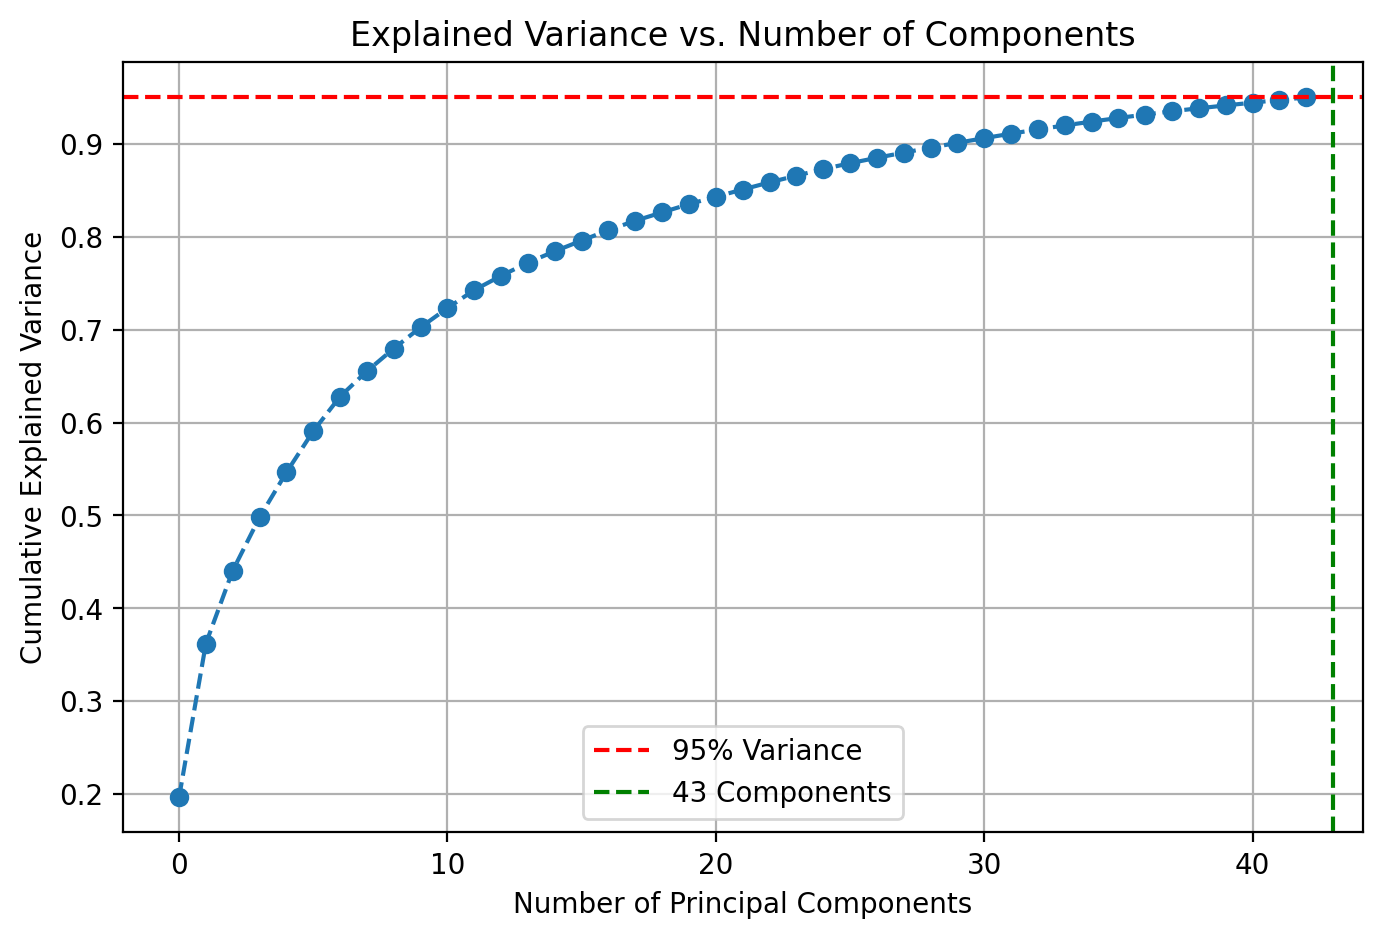

In [67]:
X_scaled_standard_train, X_scaled_standard_test = scaler_standardized (X_train, X_test)
best_alpha, X_train_sel, X_test_sel, selected_feature_names, n_features = lasso_fs(X_scaled_standard_train, X_scaled_standard_test, y_train_numeric)

def PCA_fs(X_scaled_standard_train, X_scaled_standard_test, target_variance=0.95):
    """
    Performs Principal Component Analysis (PCA) for feature reduction.

    This function applies PCA to reduce the dimensionality of the input data, 
    transforming the training and test datasets to a lower number of features 
    (specified by `n_features`), while retaining as much variance as possible.

    Args:
        n_features (int): 
            The number of principal components to retain after performing PCA.
            Based on the number of features of Lasso.

    Returns:
        tuple: A tuple containing:
            - `X_scaled_standard_train_PCA` (np.ndarray): The transformed training dataset with reduced features.
            - `X_scaled_standard_test_PCA` (np.ndarray): The transformed test dataset with reduced features.

    Notes:
        - The function assumes `X_scaled_robust_train` and `X_scaled_robust_test` are predefined globally.
        - The function applies the same transformation to both the training and test datasets, 
          ensuring that the test set is projected into the same lower-dimensional space as the training set.
    """
    pca = PCA(n_components=target_variance) # TODO: explain why 95% variance should be retained
    X_train_PCA = pca.fit_transform(X_scaled_standard_train)
    X_test_PCA = pca.transform(X_scaled_standard_test)  # Use the same transformation

    # Determine how many components were selected
    n_components_selected = pca.n_components_

    print(f"Selected {n_components_selected} components to retain {target_variance*100}% variance.")
    
    return pca, X_train_PCA, X_test_PCA, n_components_selected

# Assuming you already have the transformed PCA data
pca, X_train_pca, X_test_pca, n_components_selected = PCA_fs(X_scaled_standard_train, X_scaled_standard_test, target_variance=0.95)
best_alpha, X_train_sel, X_test_sel, selected_feature_names, n_features = lasso_fs(X_scaled_standard_train, X_scaled_standard_test, y_train_numeric)

# Plot the cumulative variance versus the number of components
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance")
plt.axvline(x=n_components_selected, color='g', linestyle='--', label=f"{n_components_selected} Components")
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.legend()
plt.grid()
plt.show()

Testing feature selections 

In [66]:
# General packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets as ds
from sklearn import metrics
import copy

# Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_predict

# # Zet de labels om naar numerieke waarden
# le = LabelEncoder()
# y_train = le.fit_transform(y_train)  # Zet 'lipoma' en 'liposarcoma' om naar 0 en 1
# y_test = le.transform(y_test)  # Pas dezelfde transformatie toe op y_test

# Define the classifiers
classifiers = {
    "LogisticRegression": LogisticRegression(max_iter=500, random_state=42),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "kNN": KNeighborsClassifier(n_neighbors=5)  # Je kunt het aantal neighbors aanpassen
}

# cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store fitted classifiers
clfs_fit = []

# Select the same features for the test set
X_train_selected = X_train_sel_lasso
X_test_selected = X_test_sel_lasso
print(X_test_selected.shape)
print(y_test_numeric.shape)

# Train and evaluate classifiers
for clf_name, clf in classifiers.items():
    # Train classifier
    # clf.fit(X_train_selected, y_train_numeric)
    Y_pred = cross_val_predict(clf, X_train_selected, y_train_numeric, cv=cv)

    # Store fitted classifier
    clfs_fit.append(copy.deepcopy(clf))

    # Compute evaluation metrics
    accuracy = metrics.accuracy_score(y_train_numeric, Y_pred)

    # Handle the case where we can get probabilities
    if hasattr(clf, 'predict_proba'):
        # Get the probability for class 1 (index 1)
        y_score = cross_val_predict(clf, X_train_selected, y_train_numeric, cv=cv, method='predict_proba')[:, 1]
    else:
        # If predict_proba is not available, use the binary predictions
        y_score = Y_pred  # Use binary predictions if probability is unavailable

    auc = metrics.roc_auc_score(y_train_numeric, y_score)
    f1 = metrics.f1_score(y_train_numeric, Y_pred)
    precision = metrics.precision_score(y_train_numeric, Y_pred)
    recall = metrics.recall_score(y_train_numeric, Y_pred)

    # Print the results
    print(f"Classifier: {clf.__class__.__name__}")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  AUC: {auc:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print("-" * 50)

(23, 7)
(23,)
Classifier: LogisticRegression
  Accuracy: 0.7826
  AUC: 0.8681
  F1-Score: 0.7778
  Precision: 0.7955
  Recall: 0.7609
--------------------------------------------------
Classifier: LinearDiscriminantAnalysis
  Accuracy: 0.7935
  AUC: 0.8568
  F1-Score: 0.7912
  Precision: 0.8000
  Recall: 0.7826
--------------------------------------------------
Classifier: QuadraticDiscriminantAnalysis
  Accuracy: 0.7826
  AUC: 0.8199
  F1-Score: 0.7619
  Precision: 0.8421
  Recall: 0.6957
--------------------------------------------------
Classifier: KNeighborsClassifier
  Accuracy: 0.7174
  AUC: 0.7637
  F1-Score: 0.6905
  Precision: 0.7632
  Recall: 0.6304
--------------------------------------------------


In [70]:
# General packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets as ds
from sklearn import metrics
import copy

# Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_predict

# # Zet de labels om naar numerieke waarden
# le = LabelEncoder()
# y_train = le.fit_transform(y_train)  # Zet 'lipoma' en 'liposarcoma' om naar 0 en 1
# y_test = le.transform(y_test)  # Pas dezelfde transformatie toe op y_test

# Define the classifiers
classifiers = {
    "LogisticRegression": LogisticRegression(max_iter=500, random_state=42),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "kNN": KNeighborsClassifier(n_neighbors=5)  # Je kunt het aantal neighbors aanpassen
}

# cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store fitted classifiers
clfs_fit = []

# Select the same features for the test set
X_train_selected_pca = X_train_pca
X_test_selected_pca = X_test_pca
print(X_test_selected_pca.shape)

# Train and evaluate classifiers
for clf_name, clf in classifiers.items():
    # Train classifier
    # clf.fit(X_train_selected, y_train_numeric)
    Y_pred = cross_val_predict(clf, X_train_selected_pca, y_train_numeric, cv=cv)

    # Store fitted classifier
    clfs_fit.append(copy.deepcopy(clf))

    # Compute evaluation metrics
    accuracy = metrics.accuracy_score(y_train_numeric, Y_pred)

    # Handle the case where we can get probabilities
    if hasattr(clf, 'predict_proba'):
        # Get the probability for class 1 (index 1)
        y_score = cross_val_predict(clf, X_train_selected_pca, y_train_numeric, cv=cv, method='predict_proba')[:, 1]
    else:
        # If predict_proba is not available, use the binary predictions
        y_score = Y_pred  # Use binary predictions if probability is unavailable

    auc = metrics.roc_auc_score(y_train_numeric, y_score)
    f1 = metrics.f1_score(y_train_numeric, Y_pred)
    precision = metrics.precision_score(y_train_numeric, Y_pred)
    recall = metrics.recall_score(y_train_numeric, Y_pred)

    # Print the results
    print(f"Classifier: {clf.__class__.__name__}")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  AUC: {auc:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print("-" * 50)

(23, 43)
Classifier: LogisticRegression
  Accuracy: 0.5109
  AUC: 0.5435
  F1-Score: 0.4828
  Precision: 0.5122
  Recall: 0.4565
--------------------------------------------------
Classifier: LinearDiscriminantAnalysis
  Accuracy: 0.5761
  AUC: 0.5458
  F1-Score: 0.5714
  Precision: 0.5778
  Recall: 0.5652
--------------------------------------------------
Classifier: QuadraticDiscriminantAnalysis
  Accuracy: 0.4565
  AUC: 0.4565
  F1-Score: 0.4565
  Precision: 0.4565
  Recall: 0.4565
--------------------------------------------------
Classifier: KNeighborsClassifier
  Accuracy: 0.4891
  AUC: 0.4868
  F1-Score: 0.5053
  Precision: 0.4898
  Recall: 0.5217
--------------------------------------------------


c:\Users\lloyd\miniconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\lloyd\miniconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\lloyd\miniconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
c:\Users\lloyd\miniconda3\Lib\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


In [ ]:
# General packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets as ds
from sklearn import metrics
import copy

# Classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_predict

# # Zet de labels om naar numerieke waarden
# le = LabelEncoder()
# y_train = le.fit_transform(y_train)  # Zet 'lipoma' en 'liposarcoma' om naar 0 en 1
# y_test = le.transform(y_test)  # Pas dezelfde transformatie toe op y_test

# Define the classifiers
classifiers = {
    "LogisticRegression": LogisticRegression(max_iter=500, random_state=42),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
    "kNN": KNeighborsClassifier(n_neighbors=5)  # Je kunt het aantal neighbors aanpassen
}

# cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store fitted classifiers
clfs_fit = []

# Select the same features for the test set
X_train_selected_pca = X_train_sel_lasso
X_test_selected_pca = X_test_sel_lasso
print(X_test_selected.shape)
print(y_test_numeric.shape)

# Train and evaluate classifiers
for clf_name, clf in classifiers.items():
    # Train classifier
    # clf.fit(X_train_selected, y_train_numeric)
    Y_pred = cross_val_predict(clf, X_train_selected_pca, y_train_numeric, cv=cv)

    # Store fitted classifier
    clfs_fit.append(copy.deepcopy(clf))

    # Compute evaluation metrics
    accuracy = metrics.accuracy_score(y_train_numeric, Y_pred)

    # Handle the case where we can get probabilities
    if hasattr(clf, 'predict_proba'):
        # Get the probability for class 1 (index 1)
        y_score = cross_val_predict(clf, X_train_selected_pca, y_train_numeric, cv=cv, method='predict_proba')[:, 1]
    else:
        # If predict_proba is not available, use the binary predictions
        y_score = Y_pred  # Use binary predictions if probability is unavailable

    auc = metrics.roc_auc_score(y_train_numeric, y_score)
    f1 = metrics.f1_score(y_train_numeric, Y_pred)
    precision = metrics.precision_score(y_train_numeric, Y_pred)
    recall = metrics.recall_score(y_train_numeric, Y_pred)

    # Print the results
    print(f"Classifier: {clf.__class__.__name__}")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  AUC: {auc:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print("-" * 50)

(23, 7)
(23,)
Classifier: LogisticRegression
  Accuracy: 0.7826
  AUC: 0.8681
  F1-Score: 0.7778
  Precision: 0.7955
  Recall: 0.7609
--------------------------------------------------
Classifier: LinearDiscriminantAnalysis
  Accuracy: 0.7935
  AUC: 0.8568
  F1-Score: 0.7912
  Precision: 0.8000
  Recall: 0.7826
--------------------------------------------------
Classifier: QuadraticDiscriminantAnalysis
  Accuracy: 0.7826
  AUC: 0.8199
  F1-Score: 0.7619
  Precision: 0.8421
  Recall: 0.6957
--------------------------------------------------
Classifier: KNeighborsClassifier
  Accuracy: 0.7174
  AUC: 0.7637
  F1-Score: 0.6905
  Precision: 0.7632
  Recall: 0.6304
--------------------------------------------------


## Model selection
Random forest, decision tree and bagging

In [ ]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Encode categorical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Define models and parameter distributions
models = {
    "Random Forest": (RandomForestClassifier(random_state=42), {
        'n_estimators': randint(5, 200),
        'max_depth': randint(3, 20),
        'min_samples_split': randint(5, 20),
        'bootstrap': [True, False]
    }),
    "Bagging": (BaggingClassifier(DecisionTreeClassifier(random_state=42), random_state=42), {
        'n_estimators': randint(5, 200),
        'estimator__max_depth': randint(3, 5),
        'estimator__min_samples_split': randint(5, 20),
        'bootstrap': [True, False]
    }),
    "Decision Tree": (DecisionTreeClassifier(random_state=42), {
        'max_depth': randint(3, 5),
        'min_samples_split': randint(5, 20)
    })
}

# Perform Randomized Search and store results
best_estimators = {}
best_params = {}
best_scores = {}

for name, (model, param_dist) in models.items():
    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        n_iter=30,
        scoring='accuracy',
        cv=10,
        n_jobs=-1,
        random_state=42
    )
    search.fit(X_train, y_train_encoded) # Fitted on data without scaling and feature selection

    best_estimators[name] = search.best_estimator_
    best_params[name] = search.best_params_
    best_scores[name] = search.best_score_

# Print results
print("\n=== Model Comparison ===")
for model_name in models.keys():
    print(f"\nBest {model_name}: {best_estimators[model_name]}")
    print(f"Best {model_name} Parameters: {best_params[model_name]}")
    print(f"Best {model_name} Accuracy: {best_scores[model_name]:.4f}")


SVM

In [ ]:
from sklearn.svm import SVC

# Define base SVM model
svm_model = SVC(probability=True, random_state=42)

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'C': [0.1, 1, 10, 100, 1000],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.1, 1, 10, 100],  # Kernel coefficient
    'kernel': ['linear', 'rbf', 'poly'],  # Different kernel types
    'degree': [1, 2, 3, 4, 5, 6],  # Only used for poly kernel
}

#TIJDELIJK TODO weghalen
X_small = X_scaled_robust_train.iloc[:, [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110]]  # First 10 features
X_small_test = X_scaled_robust_test.iloc[:, [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110]]

# Randomized Search with cv=10
random_search = RandomizedSearchCV(
    estimator=svm_model,
    param_distributions=param_dist,
    n_iter=30,  # More iterations for better results
    scoring='accuracy',
    cv=10,  # 10-fold cross-validation
    n_jobs=-1,  # Use all CPU cores
    random_state=42
)

# Fit on robustly scaled training data
random_search.fit(X_small, y_train_encoded) #TODO data nog veranderen

# Get the best model and parameters
best_svm = random_search.best_estimator_
best_params_svm = random_search.best_params_
best_score_svm = random_search.best_score_

# Print results
print("\n=== Best SVM Model After Randomized Search ===")
print(f"Best SVM: {best_svm}")
print(f"Best SVM Parameters: {best_params_svm}")
print(f"Best SVM Accuracy: {best_score_svm:.4f}")


kNN

In [ ]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

# Define base kNN model
knn_model = KNeighborsClassifier()

# Define parameter distribution for RandomizedSearchCV
param_dist_knn = {
    'n_neighbors': randint(3, 50),
    'weights': ['uniform', 'distance'],
    'p': [1, 2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': randint(20, 60),
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

cv_strategy = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

#TIJDELIJK TODO weghalen
X_knn = X_scaled_robust_train.iloc[:, [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110]]  # Zelfde subset als bij SVM

random_search_knn = RandomizedSearchCV(
    estimator=knn_model,
    param_distributions=param_dist_knn,
    n_iter=30,
    scoring='accuracy',
    cv=cv_strategy,  
    n_jobs=-1,
    random_state=42
)

# Fit op geschaalde data
random_search_knn.fit(X_knn, y_train_encoded) #TODO data nog veranderen

# Beste model, parameters, en score ophalen
best_knn = random_search_knn.best_estimator_
best_params_knn = random_search_knn.best_params_
best_score_knn = random_search_knn.best_score_

# Resultaten afdrukken
print("\n=== Best kNN Model After Randomized Search ===")
print(f"Best kNN: {best_knn}")
print(f"Best kNN Parameters: {best_params_knn}")
print(f"Best kNN Accuracy: {best_score_knn:.4f}")


LDA, QDA and Logistic regression

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

# Function to perform cross-validation and get accuracy
def perform_cross_val(model, X, y, cv=10):
    return np.mean(cross_val_score(model, X, y, cv=cv, scoring='accuracy'))

# Manually comparing LDA solvers with different accuracies
lda_solvers = ['svd', 'lsqr']
lda_best_score = -np.inf
lda_best_solver = None

# Initialize LDA without solver
lda_model = LinearDiscriminantAnalysis()

for solver in lda_solvers:
    lda_model.set_params(solver=solver)
    lda_score = perform_cross_val(lda_model, X_small, y_train_encoded)
    print(f"Accuracy for LDA with solver '{solver}': {lda_score:.4f}")
    if lda_score > lda_best_score:
        lda_best_score = lda_score
        lda_best_solver = solver

print(f"\nBest LDA solver: {lda_best_solver} with accuracy: {lda_best_score:.4f}")

# For QDA, test multiple values of reg_param
qda_reg_params = [0.1, 0.3, 0.5, 0.8, 1.0]
qda_best_score = -np.inf
qda_best_reg_param = None

for reg_param in qda_reg_params:
    qda_model = QuadraticDiscriminantAnalysis(reg_param=reg_param)
    qda_score = perform_cross_val(qda_model, X_small, y_train_encoded)
    print(f"Accuracy for QDA with reg_param={reg_param}: {qda_score:.4f}")
    if qda_score > qda_best_score:
        qda_best_score = qda_score
        qda_best_reg_param = reg_param

print(f"\nBest QDA reg_param: {qda_best_reg_param} with accuracy: {qda_best_score:.4f}")

# Perform cross-validation for Logistic Regression with default parameters
log_reg_model = LogisticRegression()
log_reg_score = perform_cross_val(log_reg_model, X_small, y_train_encoded)
print(f"\nAccuracy for Logistic Regression: {log_reg_score:.4f}")


## Learning curves

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Create subplots (2 rows, 2 columns)
fig, axes = plt.subplots(4, 2, figsize=(14, 15))

# Plot learning curves for each best model
plot_learning_curve(best_svm, "SVM Learning Curve", X_small, y_train_encoded, axes[0, 0], cv=10)
plot_learning_curve(best_estimators["Random Forest"], "Random Forest Learning Curve", X_train, y_train_encoded, axes[0, 1], cv=10)
plot_learning_curve(best_estimators["Bagging"], "Bagging Classifier Learning Curve", X_train, y_train_encoded, axes[1, 0], cv=10)
plot_learning_curve(best_estimators["Decision Tree"], "Decision Tree Learning Curve", X_train, y_train_encoded, axes[1, 1], cv=10)
plot_learning_curve(best_knn, "kNN Learning Curve", X_knn, y_train_encoded, axes[2, 0], cv=10)
plot_learning_curve(lda_model.set_params(solver=lda_best_solver), "LDA Learning Curve", X_small, y_train_encoded, axes[2, 1], cv=10)
plot_learning_curve(QuadraticDiscriminantAnalysis(reg_param=qda_best_reg_param), "QDA Learning Curve", X_small, y_train_encoded, axes[3, 0], cv=10)
plot_learning_curve(log_reg_model, "Linear Regression Learning Curve", X_small, y_train_encoded, axes[3, 1], cv=10)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


## Evaluation

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# Store model names and best accuracy scores
model_scores = {
    "Random Forest": best_scores["Random Forest"],
    "Bagging": best_scores["Bagging"],
    "Decision Tree": best_scores["Decision Tree"],
    "SVM": best_score_svm,
    "kNN": best_score_knn,
    "LDA": lda_best_score,
    "QDA": qda_best_score,
    "Logistic Regression": log_reg_score
}

# Identify the best model
best_model_name = max(model_scores, key=model_scores.get)
print(f"\nBest Overall Model: {best_model_name}")

# Determine the correct dataset and fit the best model
if best_model_name in best_estimators:  # Models trained on X_scaled_robust_train
    best_model = best_estimators[best_model_name]
    best_model.fit(X_scaled_robust_train, y_train_encoded)
    y_score = best_model.predict_proba(X_scaled_robust_test)
    y_pred = best_model.predict(X_scaled_robust_test)
    
elif best_model_name == "SVM":
    best_model = best_svm
    best_model.fit(X_small, y_train_encoded)
    y_score = best_model.predict_proba(X_small_test)  # Use same subset of features
    y_pred = best_model.predict(X_small_test)

elif best_model_name == "kNN":
    best_model = best_knn
    best_model.fit(X_small, y_train_encoded)
    y_score = best_model.predict_proba(X_small_test)
    y_pred = best_model.predict(X_small_test)

elif best_model_name == "LDA":
    best_model = LinearDiscriminantAnalysis(solver=lda_best_solver)
    best_model.fit(X_small, y_train_encoded)
    y_score = best_model.predict_proba(X_small_test)
    y_pred = best_model.predict(X_small_test)

elif best_model_name == "QDA":
    best_model = QuadraticDiscriminantAnalysis(reg_param=qda_best_reg_param)
    best_model.fit(X_small, y_train_encoded)
    y_score = best_model.predict_proba(X_small_test)
    y_pred = best_model.predict(X_small_test)

elif best_model_name == "Logistic Regression":
    best_model = LogisticRegression()
    best_model.fit(X_small, y_train_encoded)
    y_score = best_model.predict_proba(X_small_test)
    y_pred = best_model.predict(X_small_test)


# Print results
print(f"\nFinal Model: {best_model_name}")
y_test_encoded = label_encoder.transform(y_test)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred)

# Print the accuracy and F1 score
print(f"Accuracy on the Test Set: {accuracy:.4f}")
print(f"F1 Score on the Test Set: {f1:.4f}")

# Plot ROC curve
plot_roc_curve(y_score, y_test_encoded)


NameError: name 'lda_best_score' is not defined